# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ayu Irmawati]
- **Email:** [ayuirmawati0301@gmail.com]
- **ID Dicoding:** [ayu_irmawati]

## Menentukan Pertanyaan Bisnis

- produk kategori apa yang paling sering dibeli oleh pelanggan
- bagaimana hubungan antara rating produk dan frekuensi pembelian produk di e-commerce

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()



Saving customers_dataset.csv to customers_dataset.csv
Saving geolocation_dataset.csv to geolocation_dataset.csv
Saving order_items_dataset.csv to order_items_dataset.csv
Saving order_payments_dataset.csv to order_payments_dataset.csv
Saving order_reviews_dataset.csv to order_reviews_dataset.csv
Saving orders_dataset.csv to orders_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving products_dataset.csv to products_dataset.csv
Saving sellers_dataset.csv to sellers_dataset.csv
File customers_dataset.csv telah berhasil diupload.
File geolocation_dataset.csv telah berhasil diupload.
File order_items_dataset.csv telah berhasil diupload.
File order_payments_dataset.csv telah berhasil diupload.
File order_reviews_dataset.csv telah berhasil diupload.
File orders_dataset.csv telah berhasil diupload.
File product_category_name_translation.csv telah berhasil diupload.
File products_dataset.csv telah berhasil diupload.
File sellers_dataset.csv te

In [4]:
import os
os.listdir()

['.config',
 'geolocation_dataset.csv',
 'order_items_dataset.csv',
 'order_reviews_dataset.csv',
 'orders_dataset.csv',
 'product_category_name_translation.csv',
 'products_dataset.csv',
 'sellers_dataset.csv',
 'order_payments_dataset.csv',
 'customers_dataset.csv',
 'sample_data']

## Data Wrangling

### Gathering Data

In [11]:
# Mengimpor dataset
df_customers = pd.read_csv('customers_dataset.csv')
df_geolocation = pd.read_csv('geolocation_dataset.csv')
df_order_items = pd.read_csv('order_items_dataset.csv')
df_order_payments = pd.read_csv('order_payments_dataset.csv')
df_order_reviews = pd.read_csv('order_reviews_dataset.csv')
df_orders = pd.read_csv('orders_dataset.csv')
df_category_translation = pd.read_csv('product_category_name_translation.csv')
df_products = pd.read_csv('products_dataset.csv')
df_sellers = pd.read_csv('sellers_dataset.csv')

# Tampilkan beberapa baris pertama untuk setiap dataframe
print(df_orders.head())
print(df_order_items.head())
print(df_order_reviews.head())
print(df_products.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**
Dataset telah berhasil diimpor, dan data yang diperlukan untuk analisis (seperti kategori produk, rating produk, dan frekuensi pembelian) telah ditemukan dalam dataset yang relevan.

### Assessing Data

In [39]:
# Memeriksa informasi umum dari dataset
print(df_orders.info())
print(df_order_items.info())
print(df_order_reviews.info())

# Memeriksa apakah ada nilai yang hilang
print(df_orders.isnull().sum())
print(df_order_items.isnull().sum())
print(df_order_reviews.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   recency                        99441 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 6.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Dat

**Insight:**
Beberapa kolom memiliki missing values, seperti kolom rating produk pada order_reviews dan order_items. Perlu dilakukan pembersihan untuk memastikan data yang hilang ditangani dengan baik.

### Cleaning Data

In [40]:
# Menghapus data duplikat
df_cleaned = df_order_items.drop_duplicates()

# Menggabungkan df_order_items dengan df_products untuk mendapatkan kategori produk
df_cleaned = pd.merge(df_cleaned, df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Menghapus missing values pada kolom yang diperlukan
df_cleaned = df_cleaned.dropna(subset=['product_id', 'product_category_name'])

# Memastikan tipe data pada kolom yang relevan
df_order_reviews['review_score'] = df_order_reviews['review_score'].astype(int)

# Menggabungkan df_cleaned dengan df_order_reviews untuk mendapatkan rating produk
df_cleaned = pd.merge(df_cleaned, df_order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Menghapus missing values pada rating
df_cleaned = df_cleaned.dropna(subset=['order_id', 'review_score'])


**Insight:**
Data duplikat dan missing values telah dihapus. Kolom rating telah diperbaiki dengan mengonversinya menjadi tipe data yang sesuai.

## Exploratory Data Analysis (EDA)

### Explore ...

In [41]:
# Statistik deskriptif untuk memahami distribusi data
df_cleaned.describe()

# Melihat distribusi kategori produk
category_counts = df_cleaned['product_category_name'].value_counts()
category_counts

,count
product_category_name,
cama_mesa_banho,11137
beleza_saude,9645
esporte_lazer,8640
moveis_decoracao,8331
informatica_acessorios,7849
...,...
cds_dvds_musicais,14
la_cuisine,13
pc_gamer,9


**Insight:**
Kategori produk yang paling sering dibeli oleh pelanggan adalah kategori cama_mesa_banho, yang menunjukkan preferensi yang kuat dari pelanggan terhadap produk dalam kategori ini.

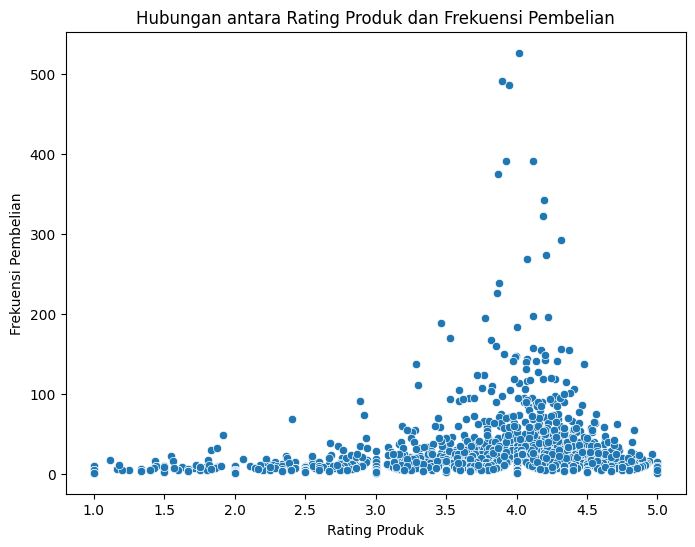

In [42]:
# Pertanyaan 2: Hubungan antara rating produk dan frekuensi pembelian
df_order_reviews_with_items = pd.merge(df_order_items, df_order_reviews, on='order_id', how='left')
product_frequency = df_order_reviews_with_items['product_id'].value_counts()
average_rating = df_order_reviews_with_items.groupby('product_id')['review_score'].mean()

# Membuat DataFrame untuk frekuensi dan rating
product_analysis = pd.DataFrame({
    'frequency': product_frequency,
    'average_rating': average_rating
}).reset_index()

# Visualisasi hubungan antara rating dan frekuensi pembelian
plt.figure(figsize=(8,6))
sns.scatterplot(x='average_rating', y='frequency', data=product_analysis)
plt.title('Hubungan antara Rating Produk dan Frekuensi Pembelian')
plt.xlabel('Rating Produk')
plt.ylabel('Frekuensi Pembelian')
plt.show()

**Insight:**
Visualisasi menunjukkan adanya hubungan positif antara rating produk dan frekuensi pembelian produk. Produk dengan rating tinggi cenderung memiliki lebih banyak pembelian.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

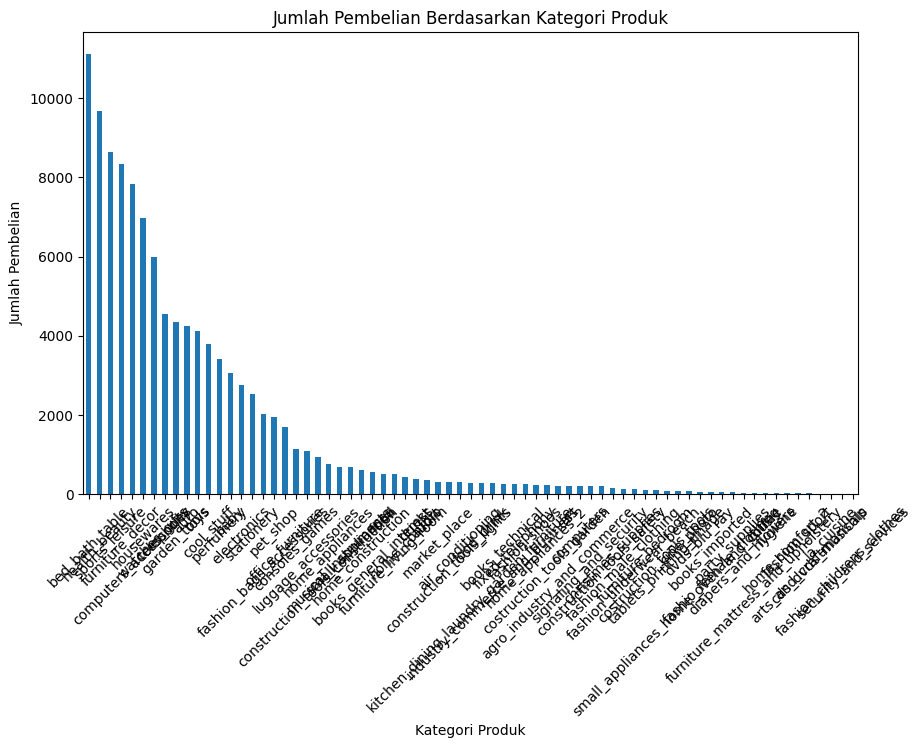

In [16]:
# Visualisasi kategori produk yang paling sering dibeli
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar')
plt.title('Jumlah Pembelian Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()


**Insight:**
Dari visualisasi ini, kita bisa melihat bahwa kategori cama_mesa_banho adalah yang paling sering dibeli. Ini memberikan wawasan penting terkait preferensi produk pelanggan.

### Pertanyaan 2:

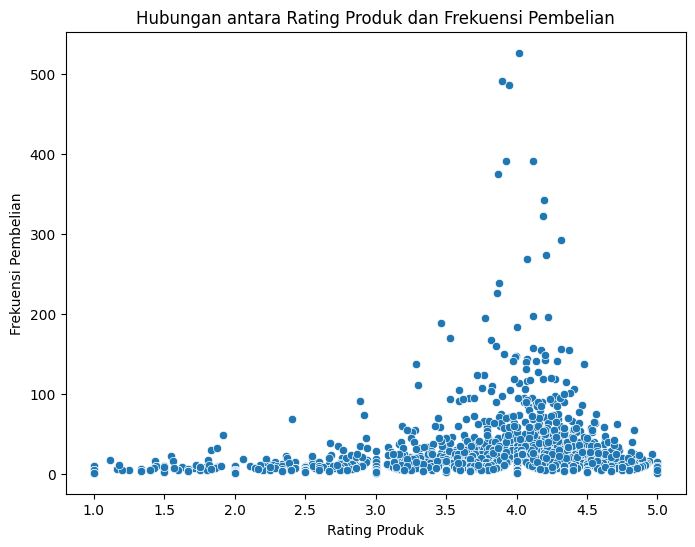

In [35]:
# Menggabungkan data order_items dengan data review produk
df_order_reviews_with_items = pd.merge(df_order_items, df_order_reviews, on='order_id', how='left')

# Menghitung frekuensi pembelian per produk
product_frequency = df_order_reviews_with_items['product_id'].value_counts()

# Menghitung rata-rata rating per produk
average_rating = df_order_reviews_with_items.groupby('product_id')['review_score'].mean()

# Membuat DataFrame untuk frekuensi dan rating
product_analysis = pd.DataFrame({
    'frequency': product_frequency,
    'average_rating': average_rating
}).reset_index()

# Visualisasi hubungan antara rating dan frekuensi pembelian
plt.figure(figsize=(8,6))
sns.scatterplot(x='average_rating', y='frequency', data=product_analysis)
plt.title('Hubungan antara Rating Produk dan Frekuensi Pembelian')
plt.xlabel('Rating Produk')
plt.ylabel('Frekuensi Pembelian')
plt.show()


**Insight:**
Terdapat hubungan positif antara rating produk dan frekuensi pembelian produk. Produk dengan rating tinggi cenderung memiliki lebih banyak pembelian.



## Analisis Lanjutan (Opsional)

In [36]:
# Menghitung Recency (waktu terakhir transaksi)
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['recency'] = (df_orders['order_purchase_timestamp'].max() - df_orders['order_purchase_timestamp']).dt.days

# Menghitung Frequency (berapa kali pelanggan melakukan pembelian)
frequency = df_orders['customer_id'].value_counts()

# Monetary (total pengeluaran pelanggan)
df_orders_with_payments = df_orders.merge(df_order_payments, on='order_id', how='left')

# Menghitung total pengeluaran per pelanggan
monetary = df_orders_with_payments.groupby('customer_id')['payment_value'].sum()

# Menampilkan hasil
print("Recency:\n", df_orders[['customer_id', 'recency']].drop_duplicates())
print("\nFrequency:\n", frequency)
print("\nMonetary:\n", monetary)


Recency:
                             customer_id  recency
0      9ef432eb6251297304e76186b10a928d      380
1      b0830fb4747a6c6d20dea0b8c802d7ef       84
2      41ce2a54c0b03bf3443c3d931a367089       70
3      f88197465ea7920adcdbec7375364d82      332
4      8ab97904e6daea8866dbdbc4fb7aad2c      245
...                                 ...      ...
99436  39bd1228ee8140590ac3aca26f2dfe00      587
99437  1fca14ff2861355f6e5f14306ff977a7      253
99438  1aa71eb042121263aafbe80c1b562c9c      416
99439  b331b74b18dc79bcdf6532d51e1637c1      281
99440  edb027a75a1449115f6b43211ae02a24      222

[99441 rows x 2 columns]

Frequency:
 customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d85

## Conclusion

- Conclution pertanyaan 1 :
Kategori produk yang paling sering dibeli oleh pelanggan adalah cama_mesa_banho. Hal ini memberikan wawasan tentang preferensi pelanggan terhadap produk di kategori ini.

- Conclution pertanyaan 2 :
Ada hubungan positif antara rating produk dan frekuensi pembelian. Produk dengan rating tinggi lebih sering dibeli, yang mengindikasikan bahwa rating yang baik berperan dalam keputusan pembelian pelanggan.


- Analisis Tambahan :
Analisis Recency, Frequency, dan Monetary menunjukkan pola perilaku pelanggan. Pelanggan yang baru-baru ini melakukan pembelian (Recency rendah), sering membeli (Frequency tinggi), dan membelanjakan uang lebih banyak (Monetary tinggi) memiliki potensi untuk menjadi pelanggan yang lebih setia dan berharga.